### Speedometer

The purpose of this file is to use a speedometer (or half donut like) to visualise the amount of available parks from total parks.

In [4]:
#This code is from here https://andrewshay.me/blog/how-to-create-a-gauge-speedometer-graphic-with-python/.  Might be useful to modify it accordingly.

import PIL

from PIL import Image

percent = 45  # Percent for gauge
output_file_name = 'new_gauge.png'

# X and Y coordinates of the center bottom of the needle starting from the top left corner
#   of the image
x = 825
y = 825
loc = (x, y)

percent = percent / 100
rotation = 180 * percent  # 180 degrees because the gauge is half a circle
rotation = 90 - rotation  # Factor in the needle graphic pointing to 50 (90 degrees)

dial = Image.open('needle.png')
dial = dial.rotate(rotation, resample=PIL.Image.BICUBIC, center=loc)  # Rotate needle

gauge = Image.open('gauge.png')
gauge.paste(dial, mask=dial) 

gauge.save(output_file_name)

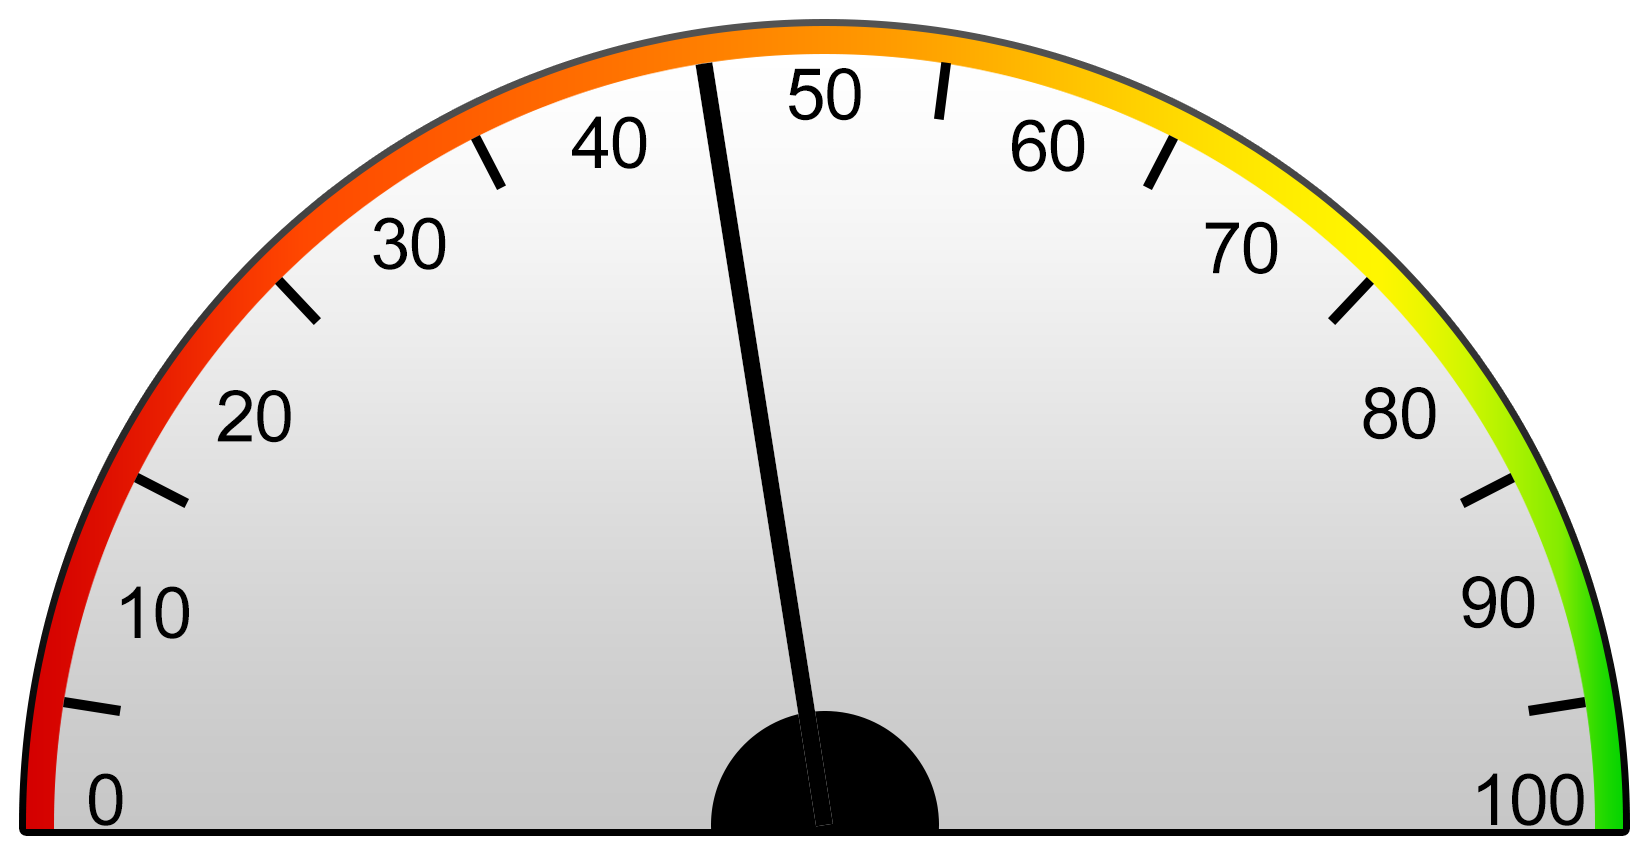

The above graphic isn't quite what we would want but could use some of the ideas from the above code.

In [6]:
! pip install plotly

     |████████████████████████████████| 23.9 MB 556 kB/s eta 0:00:01


In [13]:
import plotly.graph_objects as go

fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = 450,
    mode = "gauge+number+delta",
    title = {'text': "Speed"},
    delta = {'reference': 380},
    gauge = {'axis': {'range': [None, 500]},
             'steps' : [
                 {'range': [0, 250], 'color': "lightgray"},
                 {'range': [250, 400], 'color': "gray"}],
             'threshold' : {'line': {'color': "red", 'width': 4}, 'thickness': 0.75, 'value': 490}}))

fig.show()

#Example not rendering

In [25]:
group_sizes = [12,11,3]
halfdonut = sum(group_sizes)/2

print(group_sizes)
print(halfdonut)


[12, 11, 3]
13.0


AttributeError: 'list' object has no attribute 'info'

In [30]:
halfdonut

10.0

In [72]:
?np.round

Signature: np.round(a, decimals=0, out=None)
Docstring:
Round an array to the given number of decimals.

See Also
--------
around : equivalent function; see for details.
File:      ~/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py
Type:      function


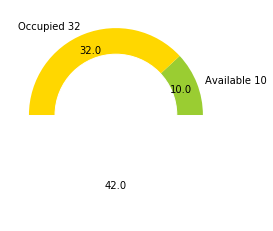

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# create data
string = f'{a}', f'{u}', f'{halfdonut}'
a = 10
u = 32
halfdonut = (a+u)
colors = ['yellowgreen', 'gold', 'white']
labels = f'Available {a}', f'Occupied {u}', ''
sizes = np.array([a,u,halfdonut])

def absolute_value(val):
    b  = np.round(val/100.*sizes.sum(), 3)
    return b


# Create a pieplot
plt.pie([a,u,halfdonut], colors = colors, labels = labels, autopct = absolute_value, pctdistance = 0.8)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

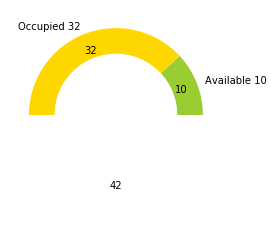

In [82]:
#Choose which format looks best.  This is better done in javascript.

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(p=pct,v=val)
    return my_autopct

# create data
string = f'{a}', f'{u}', f'{halfdonut}'
a = 10
u = 32
halfdonut = (a+u)
colors = ['yellowgreen', 'gold', 'white']
labels = f'Available {a}', f'Occupied {u}', ''
sizes = np.array([a,u,halfdonut])

def absolute_value(val):
    b  = np.round(val/100.*sizes.sum(), 3)
    return b


# Create a pieplot
plt.pie([a,u,halfdonut], colors = colors, labels = labels, autopct = make_autopct(sizes), pctdistance = 0.8)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

Now apply this to some data

In [83]:
import os

os.getcwd()

'/Users/jason/Documents/SIT764/THISGIT/d2i---melbourne-city/T2_2021/Jason_Practice'

In [85]:
os.chdir('/Users/jason/Documents/SIT784/Daily_Files')
os.getcwd()

'/Users/jason/Documents/SIT784/Daily_Files'

In [92]:
import pandas as pd
data = pd.read_csv('2021-08-13.csv')
data

,bay_id,st_marker_id,status,datetime,date
0,4044,C6126,Present,2021-08-13 12:30:39.749530,2021-08-13
1,5361,8903W,Unoccupied,2021-08-13 12:30:39.749530,2021-08-13
2,3686,7646N,Present,2021-08-13 12:30:39.749530,2021-08-13
3,6034,13079S,Unoccupied,2021-08-13 12:30:39.749530,2021-08-13
4,3843,C5566,Unoccupied,2021-08-13 12:30:39.749530,2021-08-13
...,...,...,...,...,...
35260,2694,10324E,Unoccupied,2021-08-13 23:53:27.630548,2021-08-13
35261,2696,10326E,Unoccupied,2021-08-13 23:53:27.630548,2021-08-13
35262,3004,5062E,Unoccupied,2021-08-13 23:53:27.630548,2021-08-13
35263,2702,10332E,Unoccupied,2021-08-13 23:53:27.630548,2021-08-13


In [106]:
data[data['st_marker_id'] == '3944N']

,bay_id,st_marker_id,status,datetime,date
72,2251,3944N,Unoccupied,2021-08-13 12:30:39.749530,2021-08-13
1093,2251,3944N,Unoccupied,2021-08-13 12:38:27.078249,2021-08-13
2038,2251,3944N,Unoccupied,2021-08-13 12:53:28.043401,2021-08-13
3074,2251,3944N,Unoccupied,2021-08-13 13:08:28.563349,2021-08-13
4044,2251,3944N,Unoccupied,2021-08-13 16:38:26.229055,2021-08-13
5091,2251,3944N,Unoccupied,2021-08-13 16:53:26.590088,2021-08-13
6120,2251,3944N,Unoccupied,2021-08-13 17:08:26.644282,2021-08-13
7149,2251,3944N,Unoccupied,2021-08-13 17:23:27.316272,2021-08-13
8180,2251,3944N,Unoccupied,2021-08-13 17:38:26.347707,2021-08-13
9208,2251,3944N,Unoccupied,2021-08-13 17:53:26.746329,2021-08-13


In [127]:
data

,bay_id,st_marker_id,status,datetime,date
0,4044,C6126,Present,2021-08-13 12:30:39.749530,2021-08-13
1,5361,8903W,Unoccupied,2021-08-13 12:30:39.749530,2021-08-13
2,3686,7646N,Present,2021-08-13 12:30:39.749530,2021-08-13
3,6034,13079S,Unoccupied,2021-08-13 12:30:39.749530,2021-08-13
4,3843,C5566,Unoccupied,2021-08-13 12:30:39.749530,2021-08-13
...,...,...,...,...,...
35260,2694,10324E,Unoccupied,2021-08-13 23:53:27.630548,2021-08-13
35261,2696,10326E,Unoccupied,2021-08-13 23:53:27.630548,2021-08-13
35262,3004,5062E,Unoccupied,2021-08-13 23:53:27.630548,2021-08-13
35263,2702,10332E,Unoccupied,2021-08-13 23:53:27.630548,2021-08-13


In [143]:

sample = ['3944N', 'C6126', '8903W', '7646N', ]
filtered = data.loc[data['st_marker_id'].isin(sample)]
filtered

,bay_id,st_marker_id,status,datetime,date
0,4044,C6126,Present,2021-08-13 12:30:39.749530,2021-08-13
1,5361,8903W,Unoccupied,2021-08-13 12:30:39.749530,2021-08-13
2,3686,7646N,Present,2021-08-13 12:30:39.749530,2021-08-13
72,2251,3944N,Unoccupied,2021-08-13 12:30:39.749530,2021-08-13
990,5361,8903W,Unoccupied,2021-08-13 12:38:27.078249,2021-08-13
...,...,...,...,...,...
33700,4044,C6126,Present,2021-08-13 23:38:28.047106,2021-08-13
34205,5361,8903W,Unoccupied,2021-08-13 23:53:27.630548,2021-08-13
34309,3686,7646N,Present,2021-08-13 23:53:27.630548,2021-08-13
34312,2251,3944N,Unoccupied,2021-08-13 23:53:27.630548,2021-08-13


In [154]:
data.datetime.iat[-1]

'2021-08-13 23:53:27.630548'

In [151]:
data['datetime'][-1:]

35264    2021-08-13 23:53:27.630548
Name: datetime, dtype: object

In [156]:
filtered2 = filtered[filtered['datetime'] == data.datetime.iat[-1]]
filtered2

,bay_id,st_marker_id,status,datetime,date
34205,5361,8903W,Unoccupied,2021-08-13 23:53:27.630548,2021-08-13
34309,3686,7646N,Present,2021-08-13 23:53:27.630548,2021-08-13
34312,2251,3944N,Unoccupied,2021-08-13 23:53:27.630548,2021-08-13
34767,4044,C6126,Present,2021-08-13 23:53:27.630548,2021-08-13


In [164]:
a = (filtered2['status'] == 'Unoccupied').sum()
o = (filtered2['status'] == 'Present').sum()

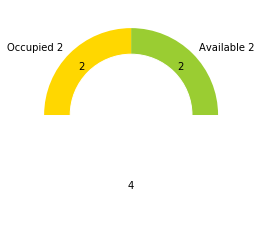

In [165]:
#Choose which format looks best.  This is better done in javascript.

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(p=pct,v=val)
    return my_autopct

# create data
string = f'{a}', f'{u}', f'{halfdonut}'
a = (filtered2['status'] == 'Unoccupied').sum()
o = (filtered2['status'] == 'Present').sum()
halfdonut = (a+u)
colors = ['yellowgreen', 'gold', 'white']
labels = f'Available {a}', f'Occupied {o}', ''
sizes = np.array([a,u,halfdonut])

def absolute_value(val):
    b  = np.round(val/100.*sizes.sum(), 3)
    return b


# Create a pieplot
plt.pie([a,u,halfdonut], colors = colors, labels = labels, autopct = make_autopct(sizes), pctdistance = 0.8)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

Try with a larger data source

In [166]:
parking = data['st_marker_id'].unique()

In [167]:
filtered3 = data.loc[data['st_marker_id'].isin(parking)]
filtered3

,bay_id,st_marker_id,status,datetime,date
0,4044,C6126,Present,2021-08-13 12:30:39.749530,2021-08-13
1,5361,8903W,Unoccupied,2021-08-13 12:30:39.749530,2021-08-13
2,3686,7646N,Present,2021-08-13 12:30:39.749530,2021-08-13
3,6034,13079S,Unoccupied,2021-08-13 12:30:39.749530,2021-08-13
4,3843,C5566,Unoccupied,2021-08-13 12:30:39.749530,2021-08-13
...,...,...,...,...,...
35260,2694,10324E,Unoccupied,2021-08-13 23:53:27.630548,2021-08-13
35261,2696,10326E,Unoccupied,2021-08-13 23:53:27.630548,2021-08-13
35262,3004,5062E,Unoccupied,2021-08-13 23:53:27.630548,2021-08-13
35263,2702,10332E,Unoccupied,2021-08-13 23:53:27.630548,2021-08-13


In [169]:
filtered4 = filtered3[filtered3['datetime'] == data.datetime.iat[-1]]
filtered4

,bay_id,st_marker_id,status,datetime,date
34199,5902,C9044,Unoccupied,2021-08-13 23:53:27.630548,2021-08-13
34200,6037,13085S,Present,2021-08-13 23:53:27.630548,2021-08-13
34201,8123,15146N,Unoccupied,2021-08-13 23:53:27.630548,2021-08-13
34202,4400,C7234,Unoccupied,2021-08-13 23:53:27.630548,2021-08-13
34203,5804,12536N,Unoccupied,2021-08-13 23:53:27.630548,2021-08-13
...,...,...,...,...,...
35260,2694,10324E,Unoccupied,2021-08-13 23:53:27.630548,2021-08-13
35261,2696,10326E,Unoccupied,2021-08-13 23:53:27.630548,2021-08-13
35262,3004,5062E,Unoccupied,2021-08-13 23:53:27.630548,2021-08-13
35263,2702,10332E,Unoccupied,2021-08-13 23:53:27.630548,2021-08-13


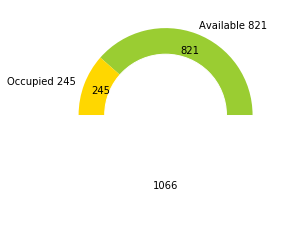

In [174]:
#Choose which format looks best.  This is better done in javascript.

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(p=pct,v=val)
    return my_autopct

# create data
string = f'{a}', f'{u}', f'{halfdonut}'
a = (filtered4['status'] == 'Unoccupied').sum()
o = (filtered4['status'] == 'Present').sum()
halfdonut = (a+o)
colors = ['yellowgreen', 'gold', 'white']
labels = f'Available {a}', f'Occupied {o}', ''
sizes = np.array([a,o,halfdonut])

def absolute_value(val):
    b  = np.round(val/100.*sizes.sum(), 3)
    return b


# Create a pieplot
plt.pie([a,o,halfdonut], colors = colors, labels = labels, autopct = make_autopct(sizes), pctdistance = 0.8)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()